<a href="https://colab.research.google.com/github/paulohenrique1303/Classification-Model/blob/main/Classification_Model_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import numpy as np #Para tratar e manioular arrays
import pandas as pd #Para tratar e manipular dataframes
from sklearn.model_selection import train_test_split #Para pazer a divisão dos dados de treino e teste
from sklearn.preprocessing import StandardScaler #Classe para reescalar dados
from sklearn.svm import LinearSVC #Algoritmo de Classificação Linear
from sklearn.svm import SVC #Algoritmo de classificação não linear
from sklearn.dummy import DummyClassifier #Classificador 'burro' base line
from sklearn.metrics import accuracy_score #Função para calcular a taxa de acerto
import matplotlib.pyplot as plt #Plotagem de gráficos
import seaborn as sns #Plotagem de gráficos
from sklearn.pipeline import Pipeline #Criação de Pipeline

# O objetivo é relacionar as horas demandadas para finalizar o projeto web e o preço para classificar se o projeto vai ser ou não finalizado.

###1 passo: Abrir o arquivo

In [2]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


###2 passo: Renomear colunas

In [3]:
mapa = {
    'unfinished' : 'nao_finalizado',
    'expected_hours' : 'horas_esperadas',
    'price' : 'preço'
}
dados = dados.rename(columns= mapa)

In [4]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preço,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


###3 passo: Visualização dos dados

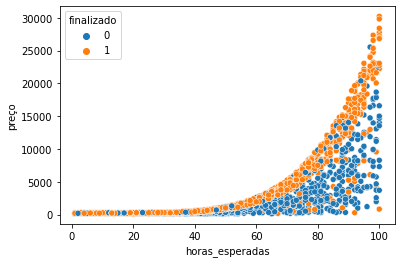

In [5]:
sns.scatterplot(x = 'horas_esperadas' , y= 'preço', hue= 'finalizado', data= dados)

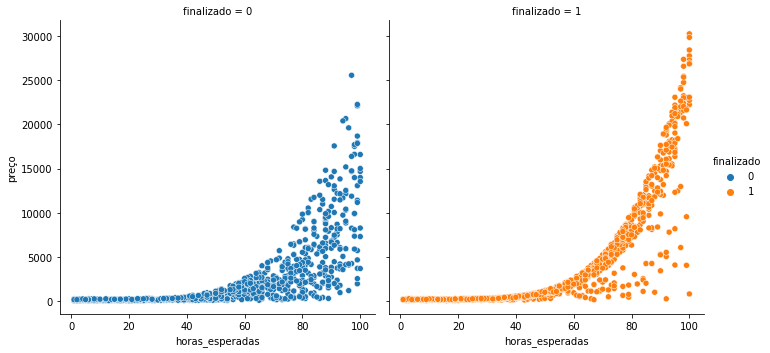

In [6]:
sns.relplot(x = 'horas_esperadas' , y= 'preço', hue= 'finalizado',col= 'finalizado', data= dados)

###4 passo: Definindo as caractéristicas (x) e os rotulos (y).

In [7]:
x = dados[['horas_esperadas' , 'preço']]
x.head()

,horas_esperadas,preço
0,26,192
1,88,9015
2,89,2577
3,42,275
4,39,170


In [8]:
y = dados['finalizado']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: finalizado, dtype: int64

##Algoritmo Linear SVC

In [10]:
seed = 5
np.random.seed(seed)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)
print('O modelo será treinado com %d elementos da amostra e treinado com %d elementos da amostra' % (x_train.shape[0], x_test.shape[0]))

modelo = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC())
])
modelo.fit(x_train, y_train)
modelo.predict(x_test)
acc = accuracy_score(y_test, modelo.predict(x_test)) * 100
print('Acurácia: %.2f%%' % acc)

O modelo será treinado com 1617 elementos da amostra e treinado com 540 elementos da amostra
Acurácia: 56.67%


In [11]:
baseline = np.ones(540)
accuracy = accuracy_score(y_test, baseline)
print(f'A precissão de base foi de {accuracy * 100:.2f}%')

A precissão de base foi de 52.59%


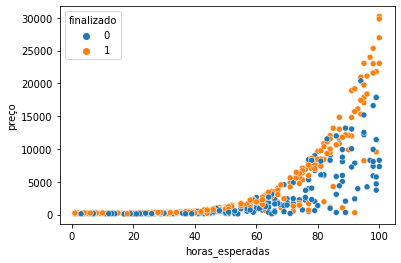

In [12]:
sns.scatterplot(x = 'horas_esperadas' , y= 'preço', hue= y_test, data= x_test)

In [13]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.preço.min()
y_max = x_test.preço.max()

In [14]:
pixels = 100
eixo_x = np.arange( x_min , x_max , (x_max - x_min) / pixels)
eixo_y = np.arange( y_min , y_max , (y_max - y_min) / pixels)

In [15]:
xx, yy= np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel() , yy.ravel()]

In [20]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


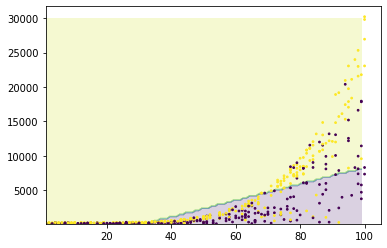

In [21]:
plt.contourf(xx, yy, z, alpha= 0.2)
plt.scatter(x_test.horas_esperadas, x_test.preço, c= y_test, s= 3)

Conlussão do modelo:
Esse Algortimo (Estimador)Linear SVC separa as duas classes por uma linha, e podemos notar que a faixa minima que separa as duas classes é uma curva. 

##Agoritmo SVC

Esse Estimador encontra relacionamentos não lineares.

In [22]:
seed = 5
np.random.seed(seed)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)
print('O modelo será treinado com %d elementos da amostra e treinado com %d elementos da amostra' % (x_train.shape[0], x_test.shape[0]))

modelo = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(gamma = 'auto'))
])
modelo.fit(x_train, y_train)
modelo.predict(x_test)
acc = accuracy_score(y_test, modelo.predict(x_test)) * 100
print('Acurácia: %.2f%%' % acc)

O modelo será treinado com 1617 elementos da amostra e treinado com 540 elementos da amostra
Acurácia: 66.85%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


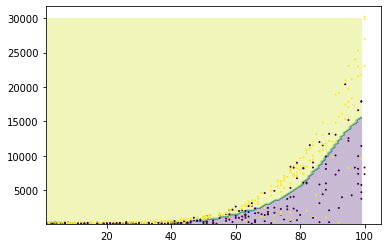

In [24]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.preço.min()
y_max = x_test.preço.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_test.horas_esperadas, x_test.preço, c=y_test, s=1)

# DECISION BOUNDARY

Conlusão do modelo: Esse modelo além de ter uma pressição melhor o algotimo foi capaz de apreender a faixa minima que separa as duas classes.   

